# Workflows usage behviour analysis

Analysis of the usage behaviour of the workflows in the dataset.

In [1]:
import pandas as pd

individual_df = pd.read_csv("/workspace/data/workflows/individual_freq.csv")
individual_df.sort_values("frequency", ascending=False)[:5]

,type,name,frequency
8,Action,SetValueByConst,20642
12,Action,SetValueByProperty,10977
1,Event,OnPropertyChanged,8346
3,Event,OnCustomEvent,7986
14,Action,SetValueByExpression,7641


In [2]:
pair_df = pd.read_csv("/workspace/data/workflows/pair_freq.csv")
pair_df.sort_values("frequency", ascending=False)[:5]

,event,action,frequency
5,OnCustomEvent,SetValueByConst,7114
2,OnPropertyChanged,SetValueByConst,6965
28,OnCustomEvent,SetValueByProperty,5337
34,OnBeforeCommit,SetValueByConst,3579
1,OnPropertyChanged,OnPropertyChanged,3425


## Plot the individual frequency of actions and events

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


def plot_individual_frequency(
    dataframe: pd.DataFrame,
    name: str,
    cmap: str,
    top: int = 5,
    xlabel: str = None,
    ylabel: str = None,
    x: str = "name",
    y: str = "frequency",
    has_long_text: bool = False,
):
    internal_df = dataframe.sort_values("frequency", ascending=False)
    internal_df = internal_df.head(top)

    # create colors
    unique_names = internal_df[x].unique()
    colors = ListedColormap(sns.color_palette(cmap, len(unique_names)))
    color_dict = {cat: colors(i) for i, cat in enumerate(unique_names)}
    name_colors = internal_df[x].map(color_dict).tolist()

    plt.figure(figsize=(20, 10))
    plt.suptitle(f"Top {top} {name}", fontsize=25)

    plt.subplot(1, 2, 1)
    sns.barplot(
        data=internal_df,
        x=x,
        y=y,
        hue=x,
        palette=name_colors,
        legend=False,
    )
    plt.xlabel(xlabel or f"'{name}' Name")
    plt.ylabel(ylabel or "Frequency")
    if has_long_text:
        plt.xticks(rotation=45, ha="right")

    plt.subplot(1, 2, 2)
    plt.pie(
        internal_df[y],
        labels=internal_df[x],
        autopct="%1.1f%%",
        startangle=140,
        colors=name_colors,
    )

    plt.tight_layout()
    plt.show()

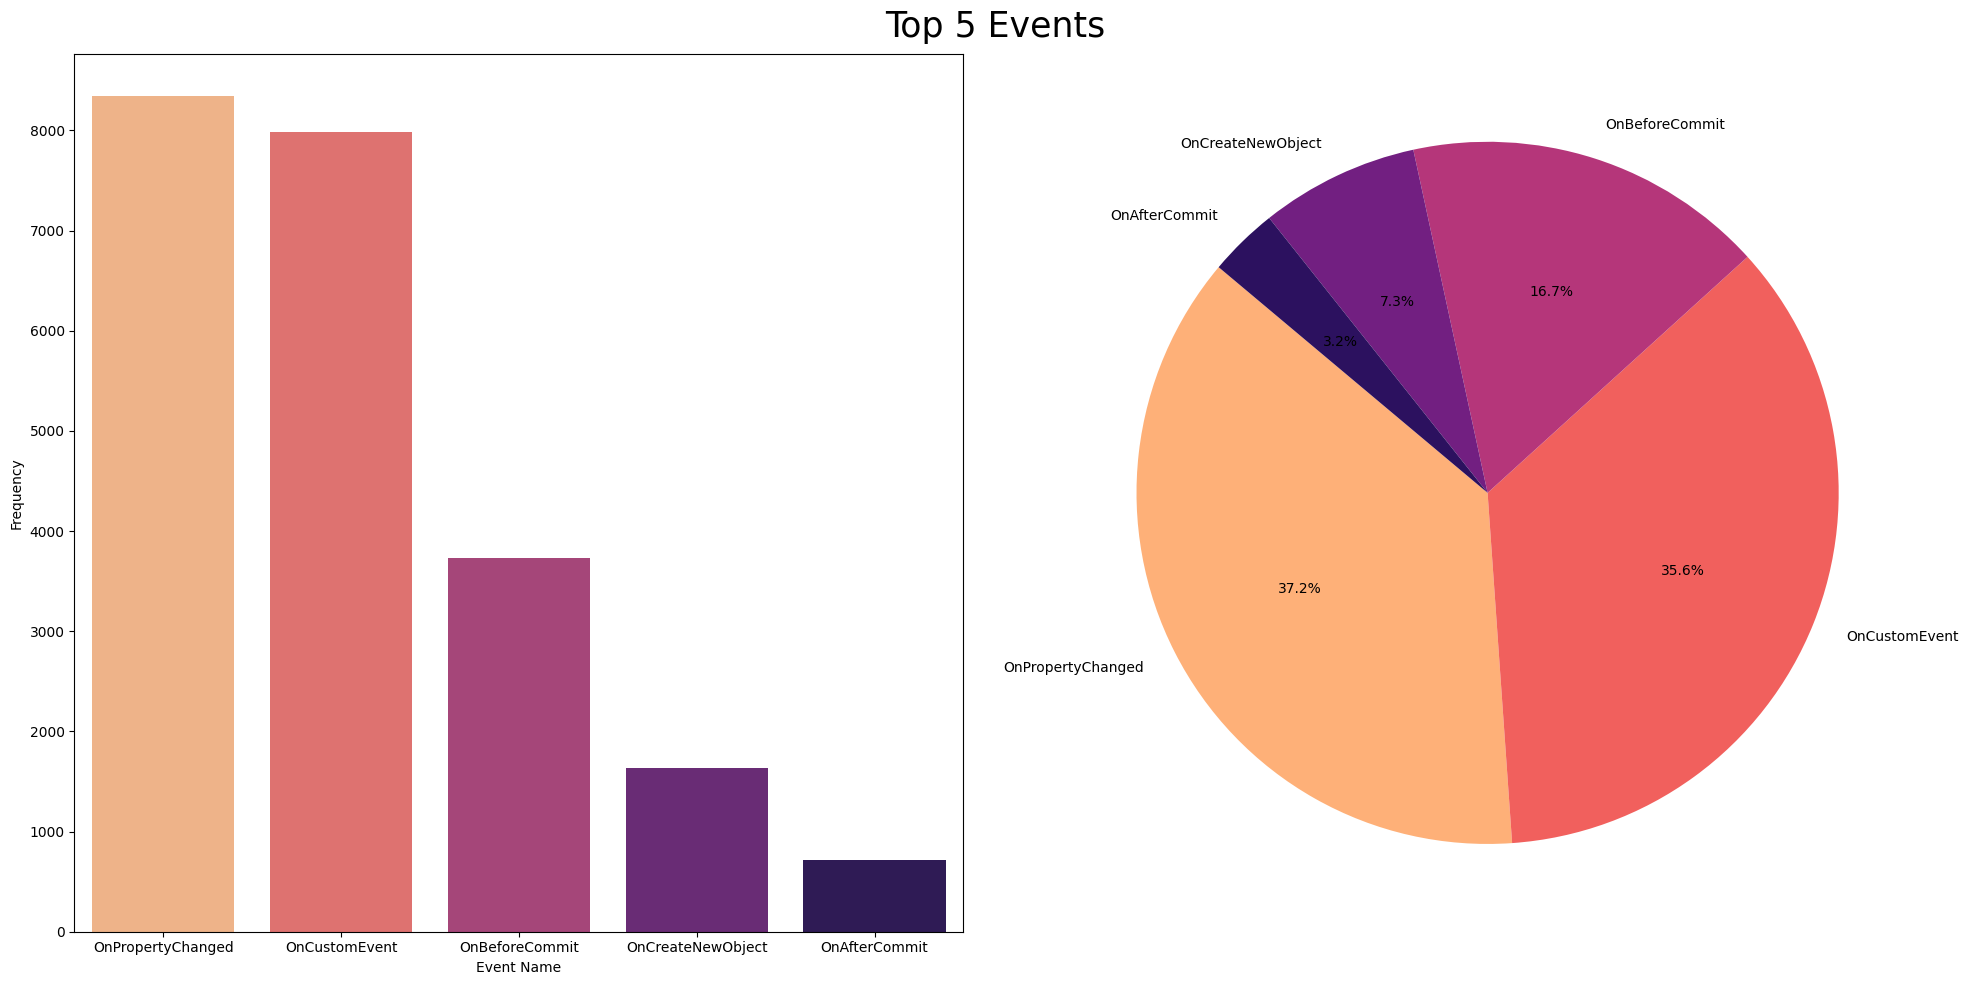

In [29]:
events_df = individual_df[individual_df['type'] == 'Event']
plot_individual_frequency(events_df, "Events", "magma_r", xlabel="Event Name")

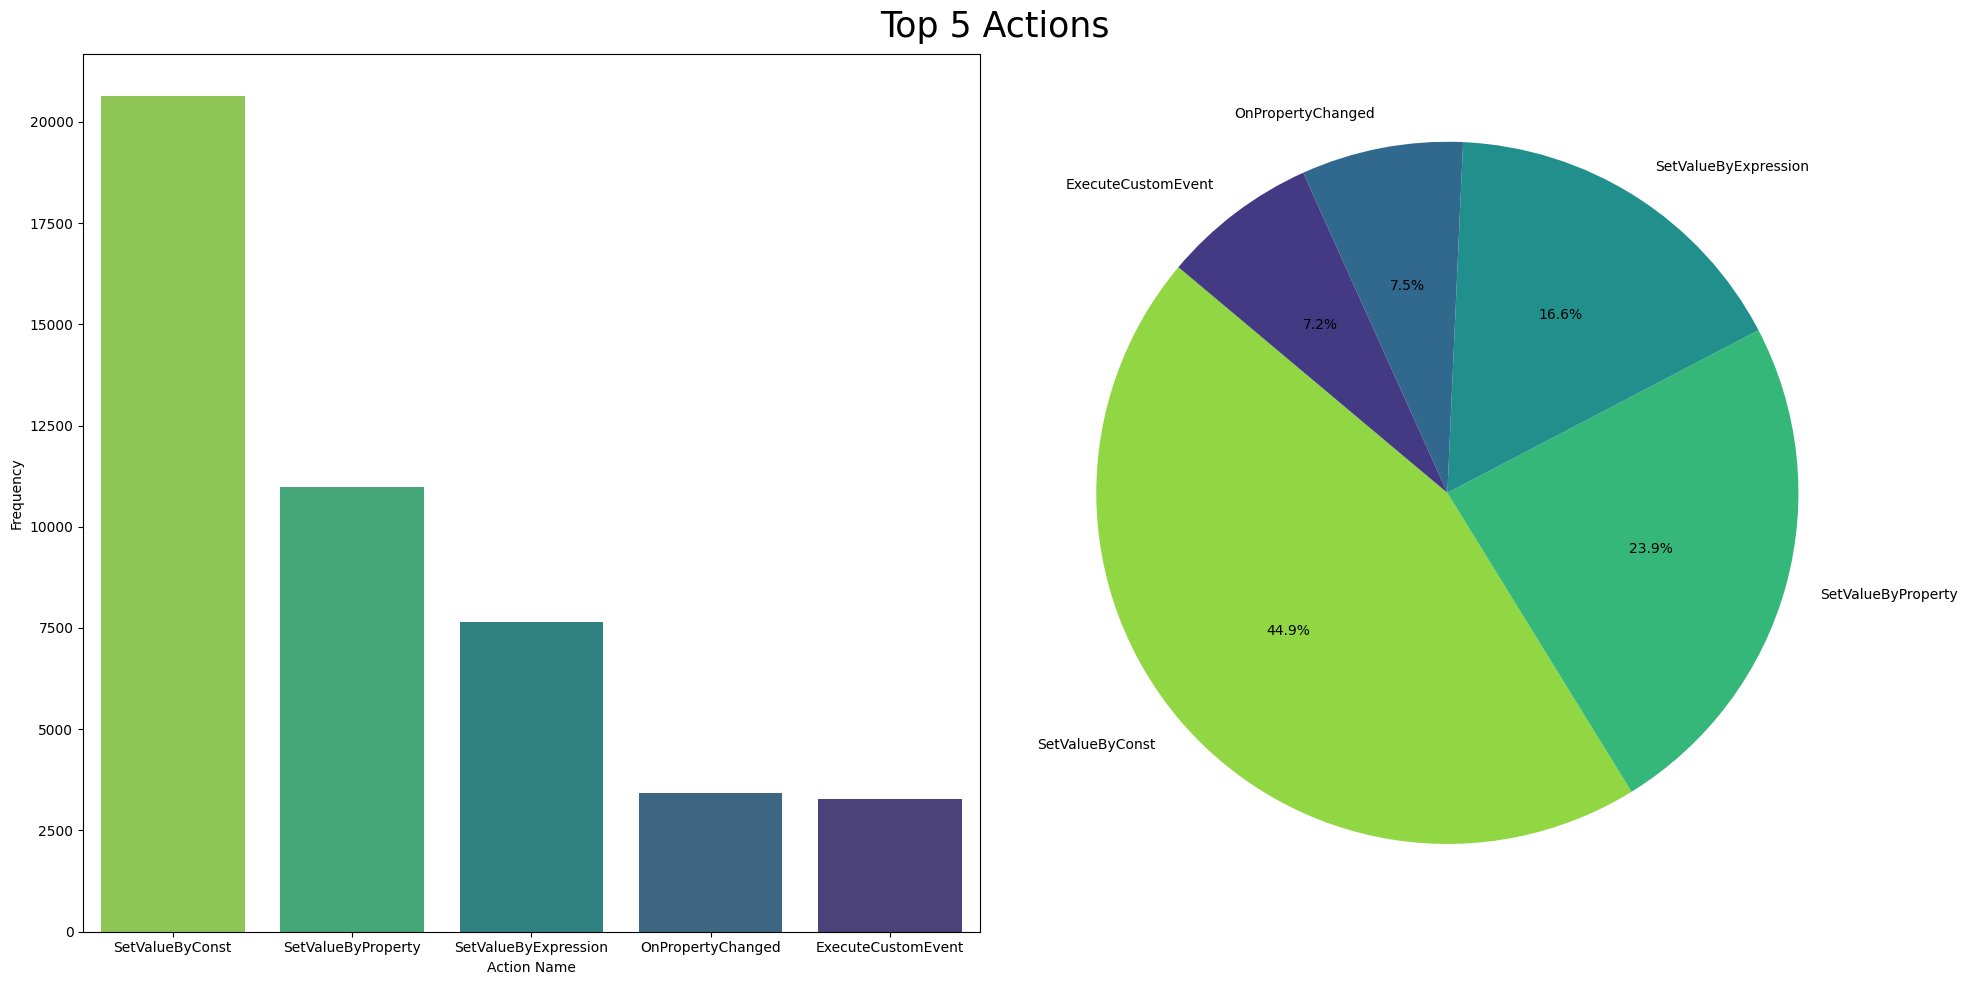

In [30]:
actions_df = individual_df[individual_df['type'] == 'Action']
plot_individual_frequency(actions_df, "Actions", "viridis_r", xlabel="Action Name")

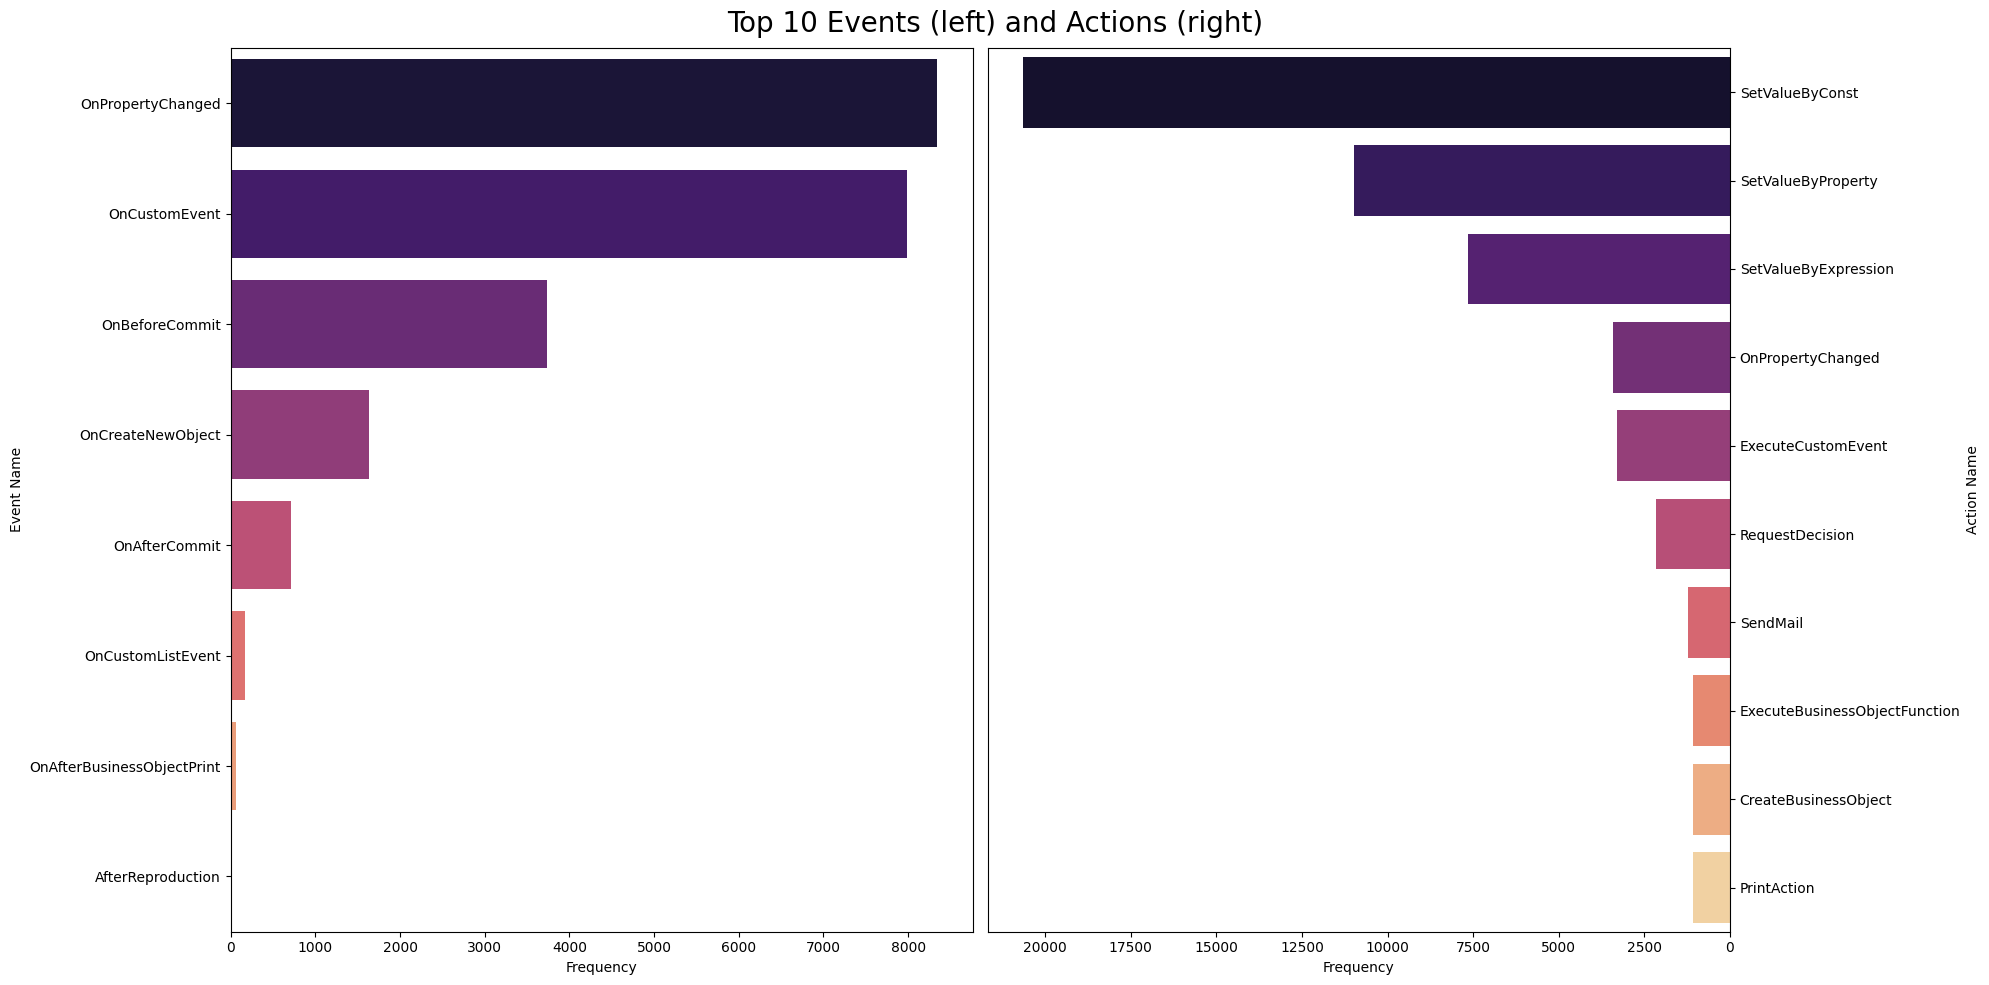

In [47]:
plt.figure(figsize=(20, 10))

plt.suptitle("Top 10 Events (left) and Actions (right)", fontsize=20)

plt.subplot(1, 2, 1)
sns.barplot(
    data=events_df.sort_values("frequency", ascending=False)[:10],
    x="frequency",
    y="name",
    hue="name",
    palette="magma",
    legend=False,
)
plt.xlabel("Frequency")
plt.ylabel("Event Name")

plt.subplot(1, 2, 2)
sns.barplot(
    data=actions_df.sort_values("frequency", ascending=False)[:10],
    x="frequency",
    y="name",
    hue="name",
    palette="magma",
    legend=False,
)
plt.xlabel("Frequency")
plt.ylabel("Action Name")
plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")

plt.tight_layout()
plt.show()

## Plots for the frequency of actions and events sequences (pairs)

In [18]:
pair_df['event_action'] = pair_df['event'] + ' - ' + pair_df['action']
pair_df

,event,action,frequency,event_action
0,OnCreateNewObject,SetValueByConst,2391,OnCreateNewObject - SetValueByConst
1,OnPropertyChanged,OnPropertyChanged,3425,OnPropertyChanged - OnPropertyChanged
2,OnPropertyChanged,SetValueByConst,6965,OnPropertyChanged - SetValueByConst
3,OnAfterCommit,SendNotification,61,OnAfterCommit - SendNotification
4,OnCustomEvent,PrintAction,742,OnCustomEvent - PrintAction
...,...,...,...,...
167,OnAfterBusinessObjectPrint,CreateBusinessObject,1,OnAfterBusinessObjectPrint - CreateBusinessObject
168,AfterReproduction,SetValueByProperty,1,AfterReproduction - SetValueByProperty
169,OnAfterCommit,ShellExecute,1,OnAfterCommit - ShellExecute
170,OnCustomEvent,Wait,4,OnCustomEvent - Wait


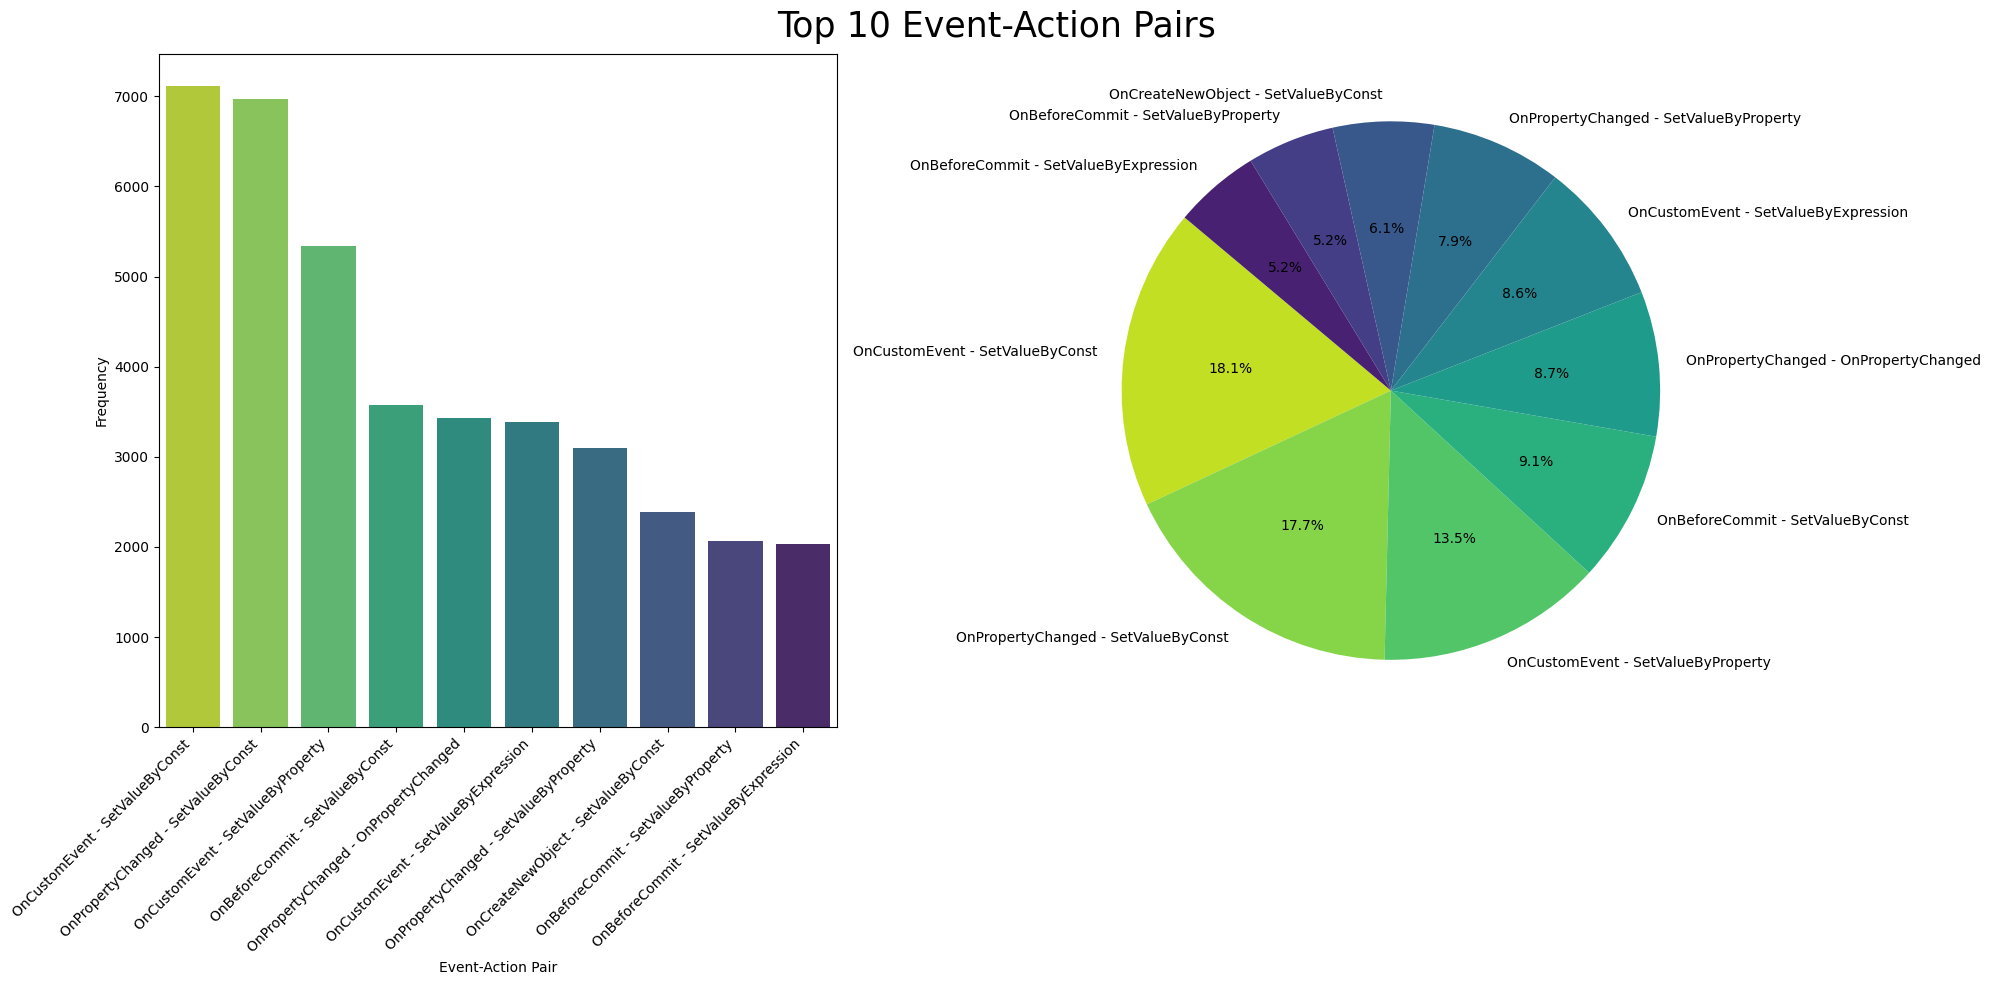

In [31]:
plot_individual_frequency(
    pair_df,
    "Event-Action Pairs",
    "viridis_r",
    x="event_action",
    y="frequency",
    xlabel="Event-Action Pair",
    top=10,
    has_long_text=True,
)